In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Import

In [2]:
df = pd.read_csv('name_name.csv', dtype={"reps": np.int64, "comm" : str, "auth" : str})


In [3]:
df.head()

,reps,auth,comm
0,26,Maria Shaldibina,Stev Witzel
1,17,Eduardo Valentin,Daniel
2,24,Eric W. Biederman,geiti94
3,519,Paul Jakma,Paul Jakma
4,122,Laxman Dewangan,Stephen Warren


## Data Cleaning

In [4]:
df.isnull().values.sum()

345

In [5]:
nan_rows = df[df.isnull().any(1)]
nan_rows

,reps,auth,comm
2295,225,NaN,root
5867,24,NaN,mark
12673,18,NaN,舒志凌
13649,55,NaN,Jeff Garzik
18747,21,John Axel Eriksson,NaN
23358,21,Fish,NaN
25165,22,NaN,黄志伟
27935,477,NaN,git-darcs-import
29367,18,Lars van de Kerkhof,NaN
29690,27,NaN,Ease


In [6]:
df = df.dropna()
df.isnull().values.sum()

0

## Sample Graph

In [7]:
dfn = df.sample(1000)
del df

In [8]:
#G = nx.DiGraph(directed=True)
#G.add_edge(1, 3, weight=8)
#G.add_edge(3, 1, weight=1)
#G.add_edge(3, 4, weight=6)
#G.add_edge(1, 2, weight=1)
#G.add_edge(2, 4, weight=3)

#pos=nx.spring_layout(G) 
#nx.draw(G,pos)
#labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [9]:
graph = nx.from_pandas_edgelist(dfn, source = 'comm', target = 'auth', edge_attr = 'reps',create_using = nx.DiGraph())

In [10]:
del dfn

pos=nx.spring_layout(graph) 
nx.draw(graph,pos)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)

## Centrality

In [11]:
print("Betweenness")
b = nx.betweenness_centrality(graph)

print("Degree centrality")
d = nx.degree_centrality(graph)

print("Closeness centrality")
c = nx.closeness_centrality(graph)

print("Eigenvector centrality")
pg = nx.pagerank(graph, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='reps', dangling=None)

print("HITS")
hub, auths = nx.hits(graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)

Betweenness
Degree centrality
Closeness centrality
Eigenvector centrality
HITS


## Top X in each Centrality

In [12]:
x = 5
from heapq import nlargest
sb = nlargest(x, b, key=b.get)
sc = nlargest(x, c, key=c.get)
sd = nlargest(x, d, key=d.get)
spg = nlargest(x, pg, key=pg.get)
shubs = nlargest(x, hub, key=hub.get)
sauths = nlargest(x, auths, key=auths.get)

In [13]:
print(sb, sc, sd, spg, shubs, sauths)

['root', 'Ben Noordhuis', 'Olof Johansson', 'Paul Reioux', 'Luke Dashjr'] ['Herbert Xu', 'Tobias Jakobi', 'Olof Johansson', 'Paul Reioux', 'David Herrmann'] ['GitHub', 'Gerrit Code Review', 'root', 'Facebook Github Bot', 'Caio Oliveira'] ['Andreas Bilke', 'Patrick Chabrier', 'Luke Ross', 'Mathias Söderberg', 'Mikaela Suomalainen'] ['GitHub', 'Gerrit Code Review', 'Facebook Github Bot', 'root', 'Caio Oliveira'] ['Vasiliy Zemlyanov', 'Rafsanul Hasan', 'Prof. Oscar Campo, PhD', 'Diego F. Ruiz S', 'Verachad Wongsawangtham']


## Distribution

In [14]:
din = dict(graph.in_degree())
dout = dict(graph.out_degree())
#for item in sorted(d, key=d.get, reverse=True):
#    print (item, d[item])
#USE b, c, d

In [15]:
from collections import defaultdict
#din
counter_indegree = defaultdict(int)
for k, v in din.items():
    counter_indegree[v]+=1
    
#dout
counter_outdegree = defaultdict(int)
for k, v in dout.items():
    counter_outdegree[v]+=1
    
#b
counter_b = defaultdict(int)
for k, v in b.items():
    counter_b[v]+=1
    
#c
counter_c = defaultdict(int)
for k, v in c.items():
    counter_c[v]+=1

#d
counter_d = defaultdict(int)
for k, v in d.items():
    counter_d[v]+=1
    
#pg
counter_pg = defaultdict(int)
for k, v in pg.items():
    counter_pg[v]+=1

In [16]:
counter_outdegree

defaultdict(int, {0: 958, 1: 633, 2: 30, 3: 6, 4: 2, 5: 2, 6: 1, 265: 1})

In [17]:
#del counter_outdegree[283]

### In Degree

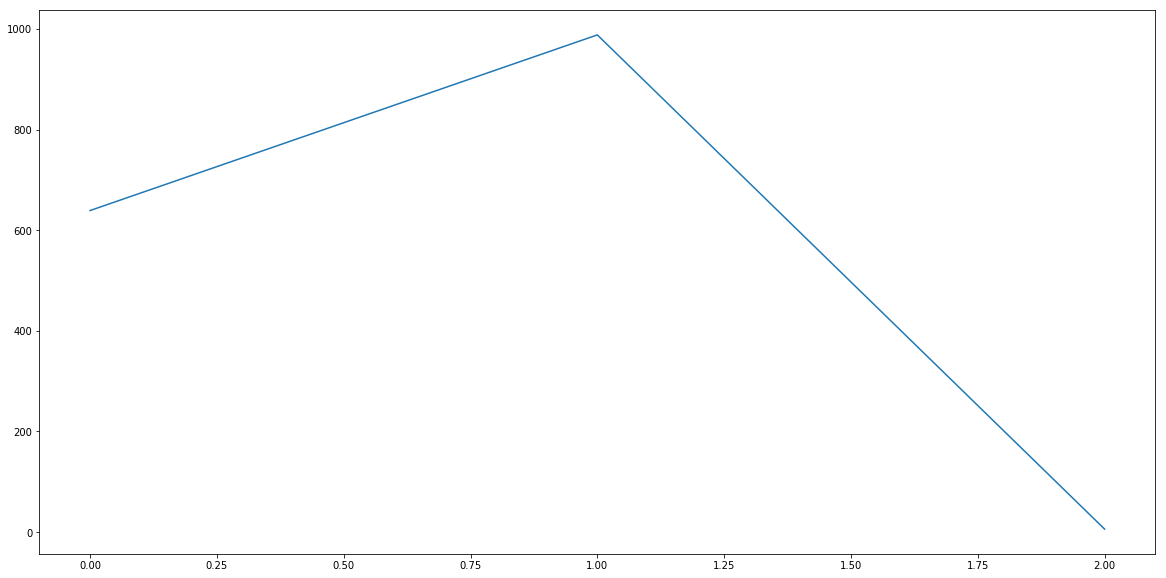

In [18]:
#plt.bar(counter_indegree.keys(), counter_indegree.values(), 0.05)
lists = sorted(counter_indegree.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.savefig('dist_in_degree.png', bbox_inches='tight')
plt.show()


### Out Degree

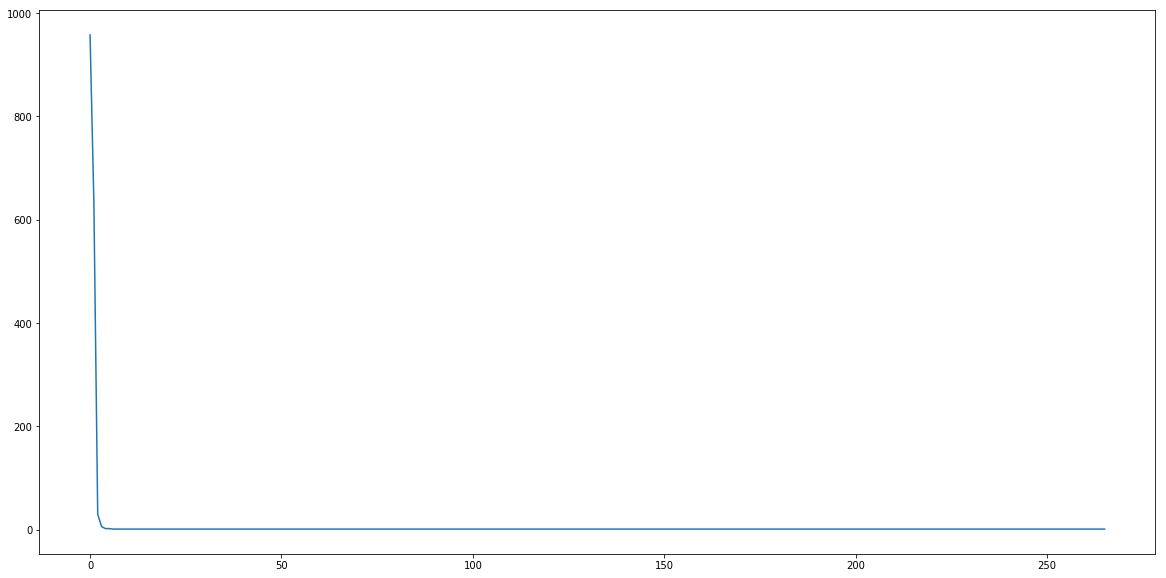

In [19]:
#plt.bar(counter_outdegree.keys(), counter_outdegree.values(), 0.5)
lists = sorted(counter_outdegree.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.savefig('dist_out_degree.png', bbox_inches='tight')
plt.show()

### Undirected Degree

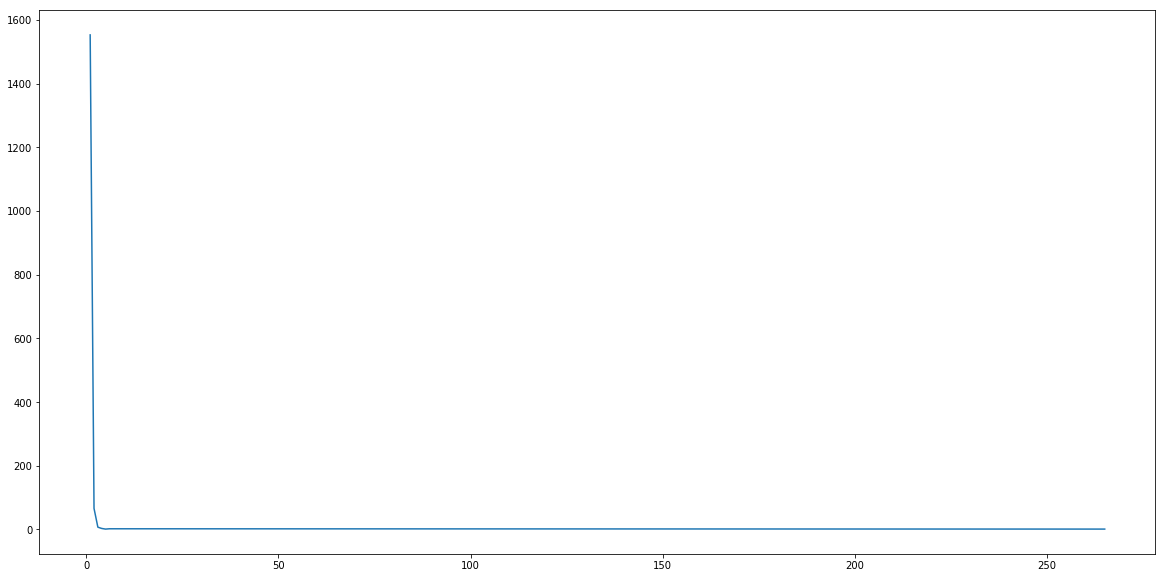

In [20]:
## HITS, SAVE IMAGES
G2 = graph.to_undirected()
ddegree = dict(G2.degree())
counter_ddegree = defaultdict(int)
for k, v in ddegree.items():
    counter_ddegree[v]+=1

lists = sorted(counter_ddegree.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.savefig('dist_und_degree.png', bbox_inches='tight')
plt.show()

del G2

In [21]:
counter_ddegree == counter_outdegree

False

### Betweeness Centrality

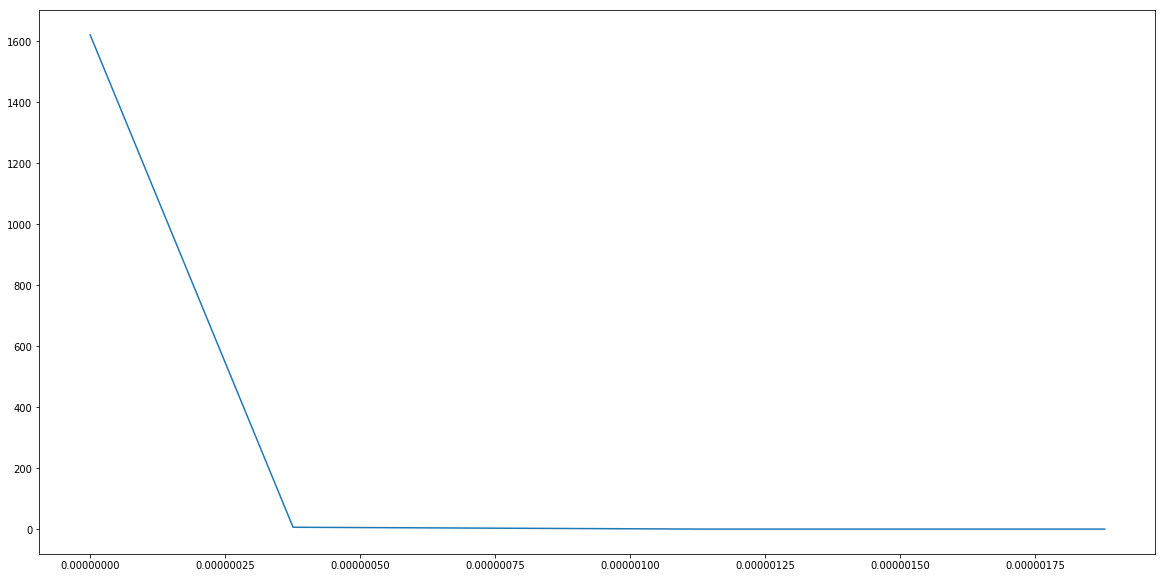

In [22]:
#plt.bar(counter_b.keys(), counter_b.values(), 0.05)
lists = sorted(counter_b.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.savefig('dist_centrality_betweeness.png', bbox_inches='tight')
plt.show()

### Degree Centrality

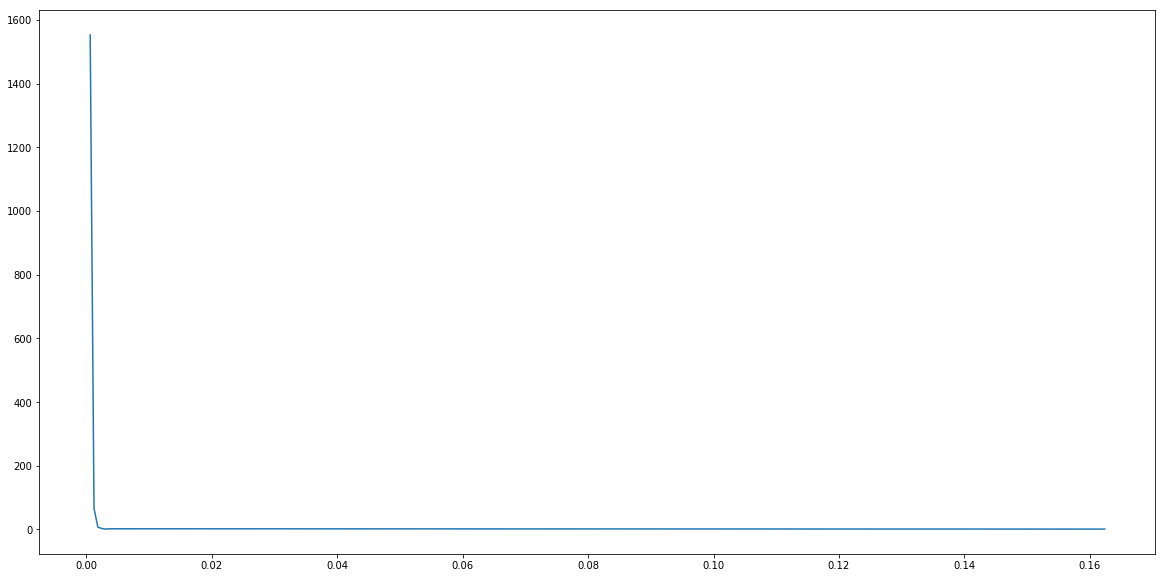

In [23]:
#plt.bar(counter_d.keys(), counter_d.values(), 0.05)
lists = sorted(counter_d.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.savefig('dist_centrality_degree.png', bbox_inches='tight')
plt.plot(x, y)
plt.show()

### Closeness Centrality

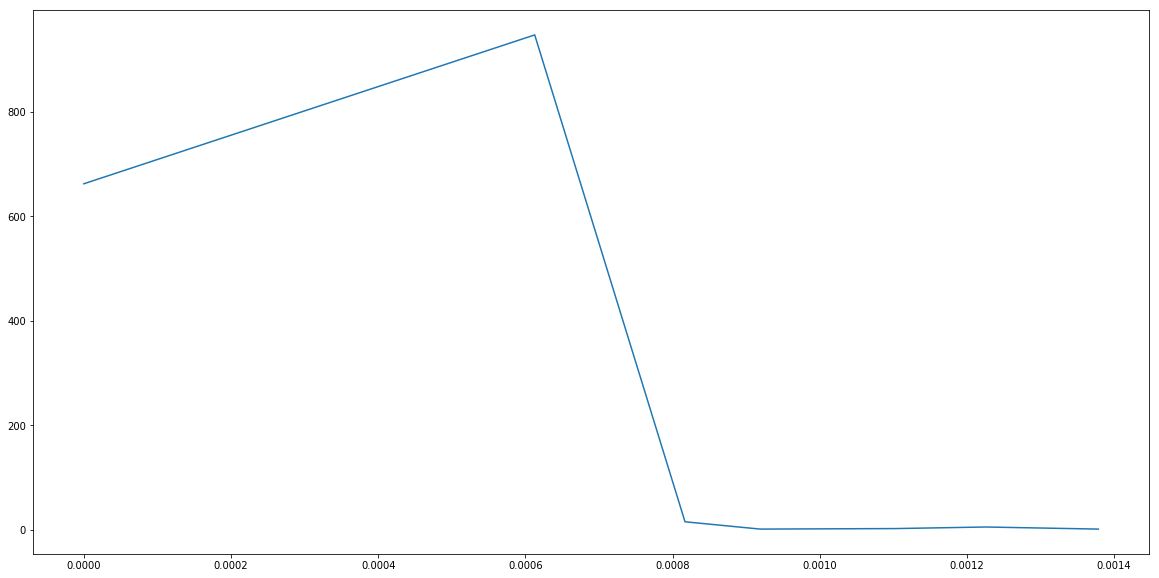

In [24]:
#plt.bar(counter_c.keys(), counter_c.values(), 0.05)
lists = sorted(counter_c.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.savefig('dist_centrality_closeness.png', bbox_inches='tight')
plt.plot(x, y)
plt.show()

### Eigen-vector (Page Rank) Centrality

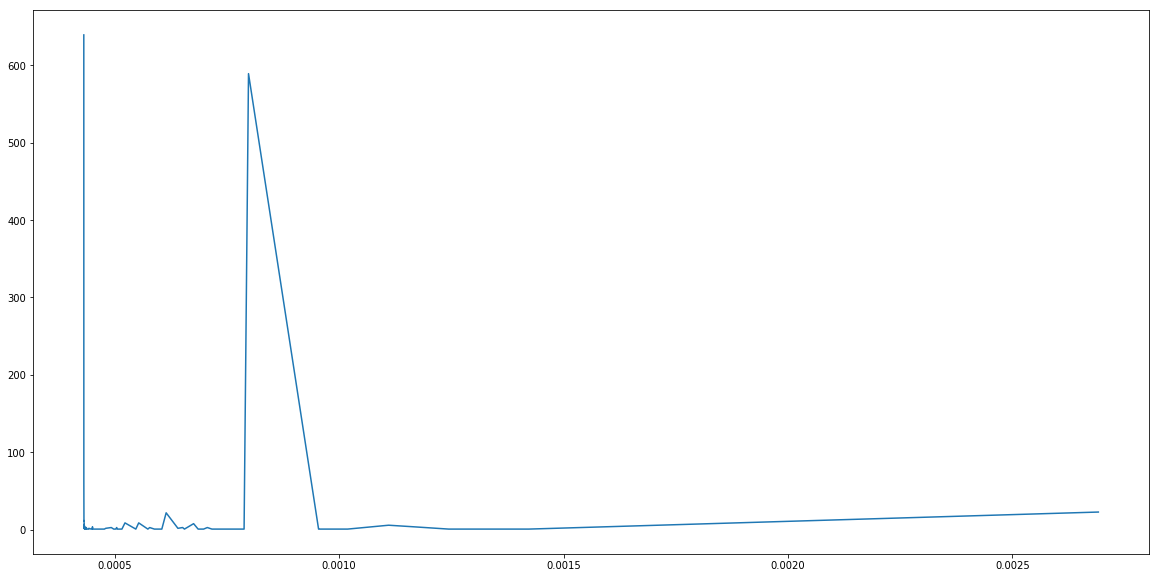

In [25]:
lists = sorted(counter_pg.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.savefig('dist_centrality_pagerank.png', bbox_inches='tight')
plt.plot(x, y)
plt.show()